In [152]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from math import sqrt

import sys


sys.path.append('../..')
# sys.path.append('../')

import optimneuralts
import viz_config
from utils import *


saves_path = '../saves'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
experiments = [
    "100_rx_100000_combis_10_patterns_35_bs512_warmup20000_nmembers512_valnoval_ldsTrue_trainevery10_patience25_usedecay_lrplateau_layers1_nonoise",
    "DE_100_rx_100000_combis_10_patterns_35_bs512_warmup20000_nmembers32_valnoval_ldsTrue_trainevery10_patience25_usedecay_lrplateau_layers1_nonoise",
]
prefix = "100_1layer"
n_trials = 10000
n_runs = 25
metrics_dict = {}
metrics = ["jaccards", "jaccards_alls","ratio_apps_alls" , "ratio_apps", "ratio_found_pats", "ratio_found_pats_alls", "losses", "dataset_losses", "n_inter_alls", "all_flagged_risks"]

for exp in experiments:
    metrics_dict[exp] = {}
    for metric in metrics:
        metrics_dict[exp][metric] = []
        for run in range(n_runs):
            path = f"{saves_path}/{exp}/{metric}/{run}.pth"
            metrics_dict[exp][metric].append(torch.load(path))


In [232]:
colors = ["tab:orange", "tab:purple", "tab:green", "tab:red", "tab:cyan", "tab:brown"]
labels = ["Adam", "DE"]
interval = 200
upper_lim = 20100
labels_fn = "_vs_".join(labels)

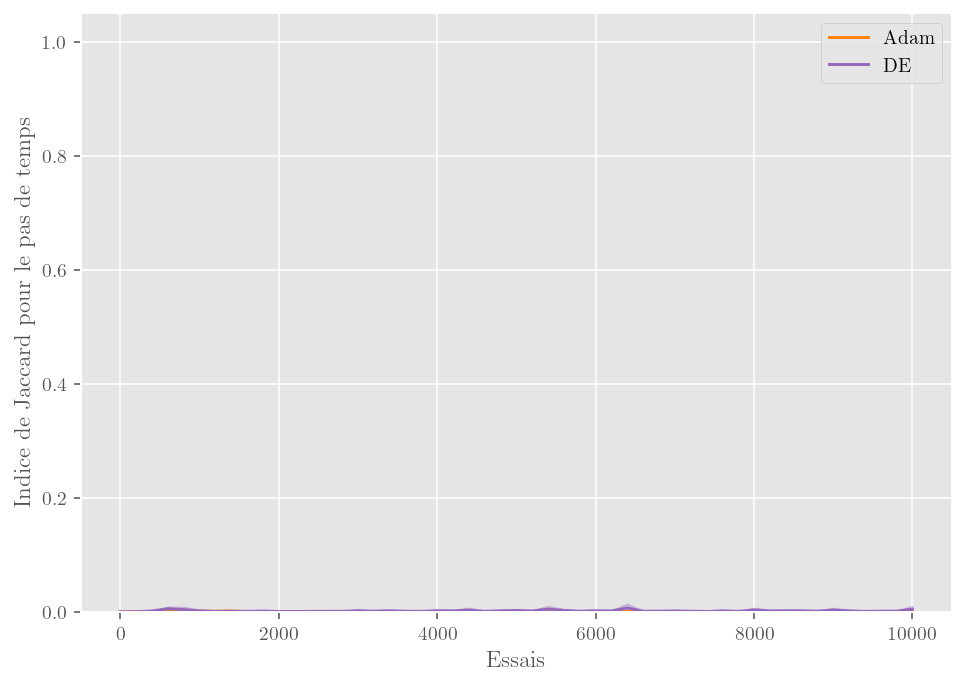

In [233]:
metric = "jaccards"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )


plt.xlabel("Essais")
plt.ylabel("Indice de Jaccard pour le pas de temps")
plt.legend()

plt.ylim(0, 1.05)

plt.tight_layout()


plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


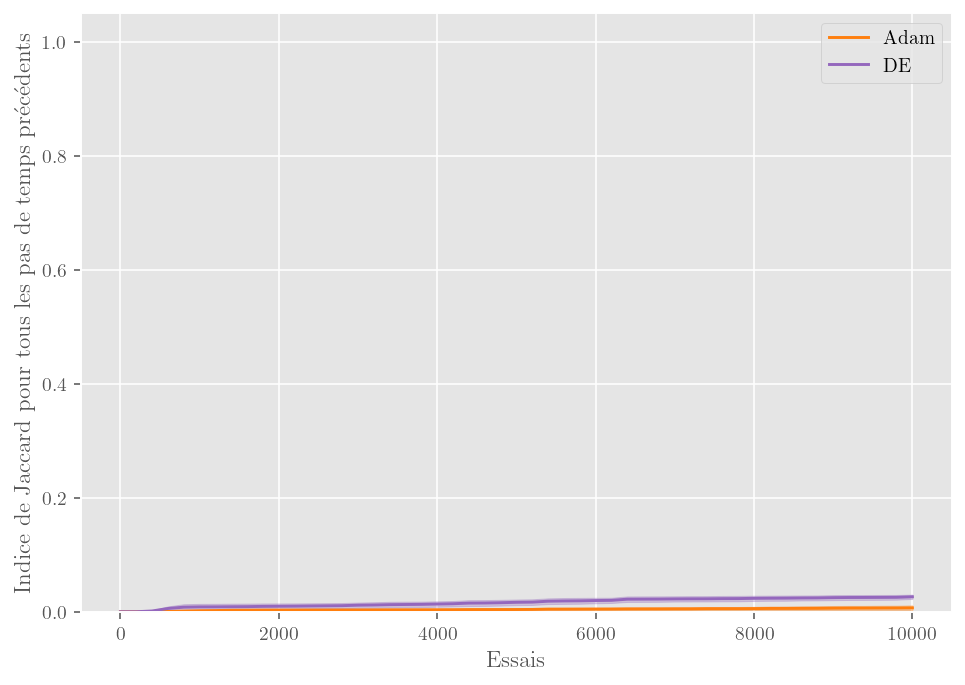

In [234]:
metric = "jaccards_alls"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )
    plt.xlabel("Essais")
    plt.ylabel("Indice de Jaccard pour tous les pas de temps précédents")
plt.legend()

plt.ylim(0, 1.05)

plt.tight_layout()

# plt.show()
plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


/tmp/ipykernel_3777037/4008741806.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3777037/4008741806.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


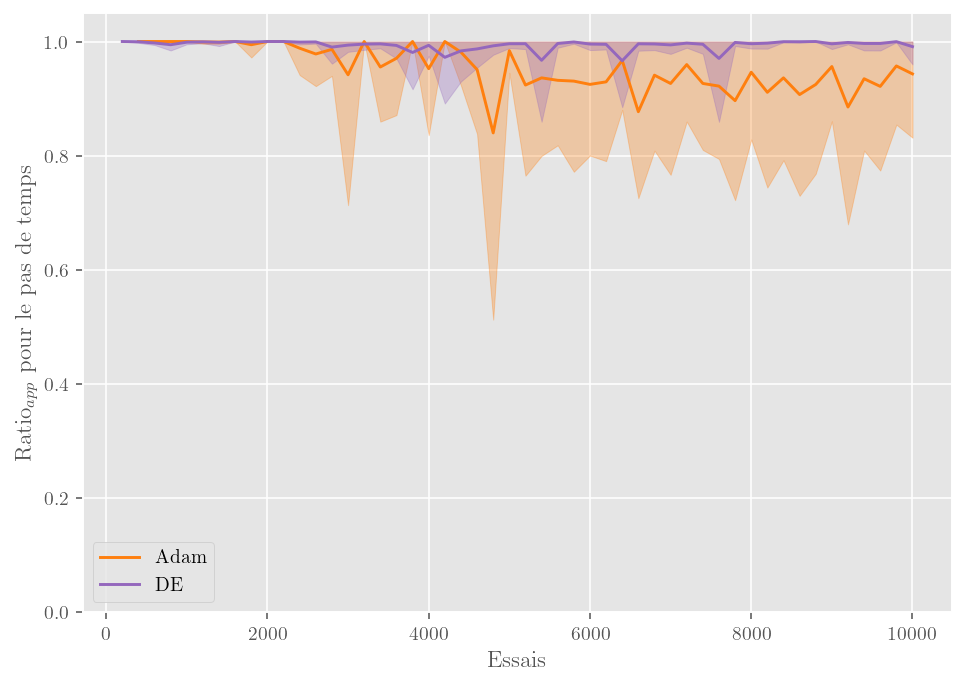

In [235]:
metric = "ratio_apps"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )
    plt.xlabel("Essais")
    plt.ylabel("Ratio$_{app}$ pour le pas de temps")
plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()
# plt.show()
plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


/tmp/ipykernel_3777037/2003601589.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3777037/2003601589.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


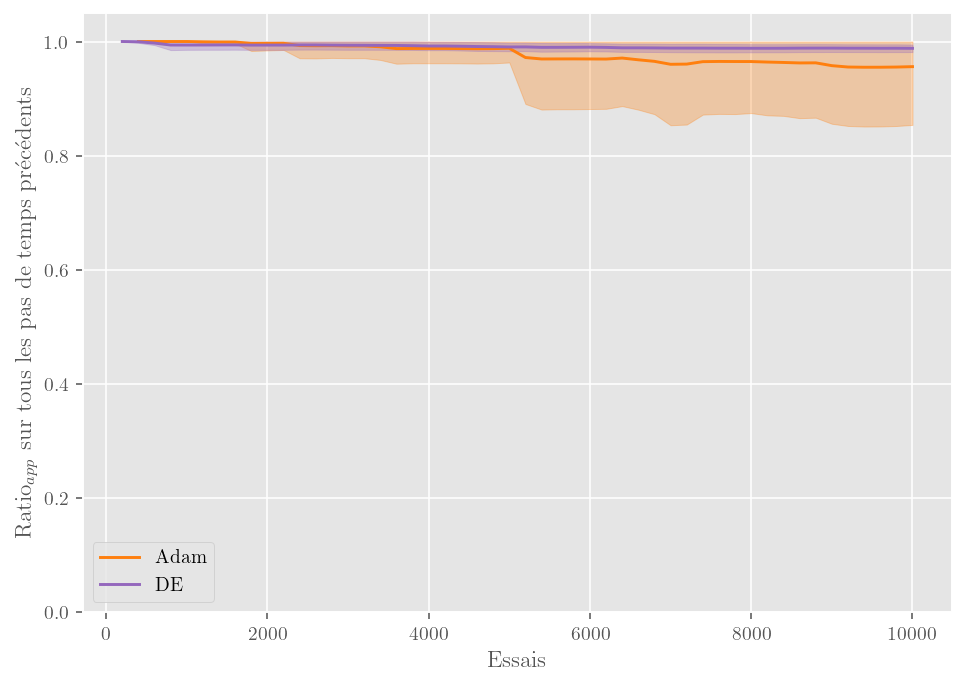

In [236]:
metric = "ratio_apps_alls"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )
    plt.xlabel("Essais")
    plt.ylabel("Ratio$_{app}$ sur tous les pas de temps précédents")
plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()
# plt.show()
plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


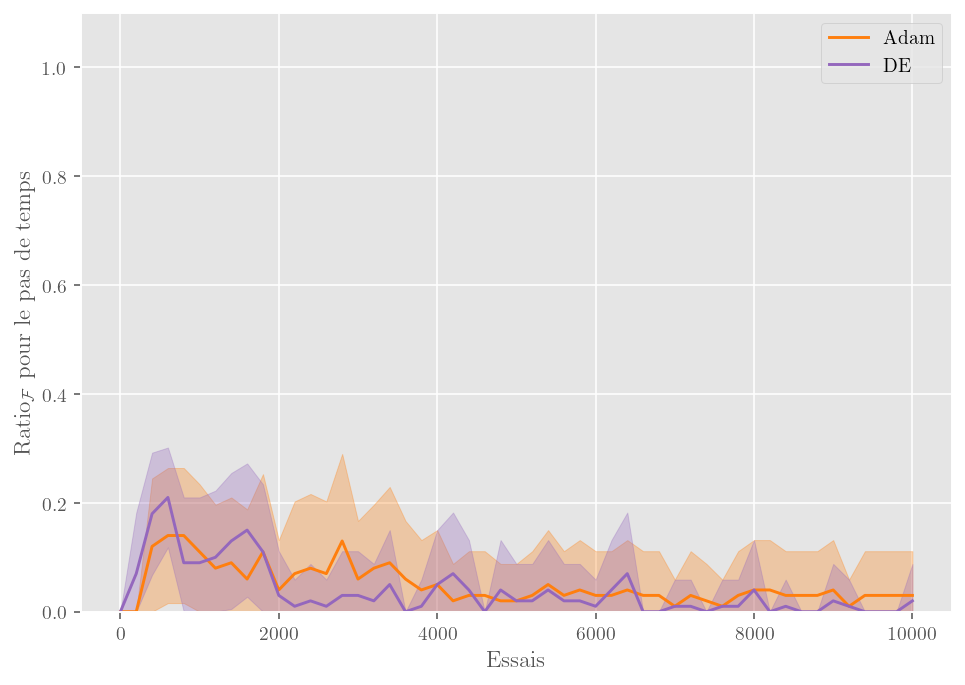

In [237]:
# Plot ratio found pat
metric = "ratio_found_pats"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval


    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, np.clip(means - stds, 0, 1), np.clip(means + stds, 0, 1), color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Ratio$_{\mathcal{F}}$ pour le pas de temps")
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()

plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')



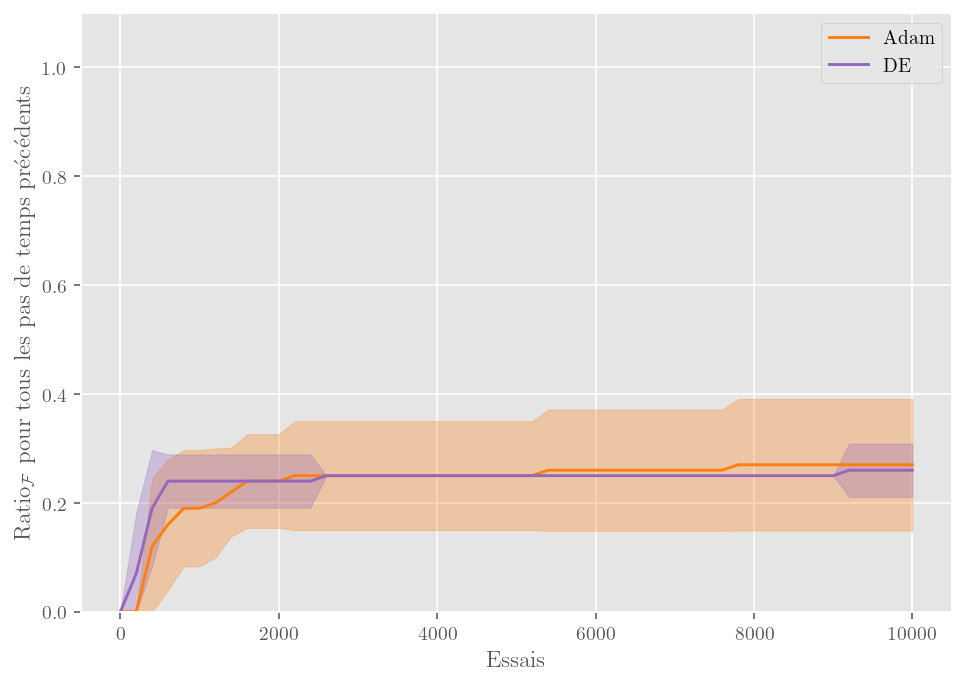

In [238]:
# Plot ratio found pat
metric = "ratio_found_pats_alls"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval


    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, np.clip(means - stds, 0, 1), np.clip(means + stds, 0, 1), color=colors[i], alpha=0.3)
plt.ylabel("Ratio$_{\mathcal{F}}$ pour tous les pas de temps précédents")
plt.xlabel('Essais')
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()


plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')



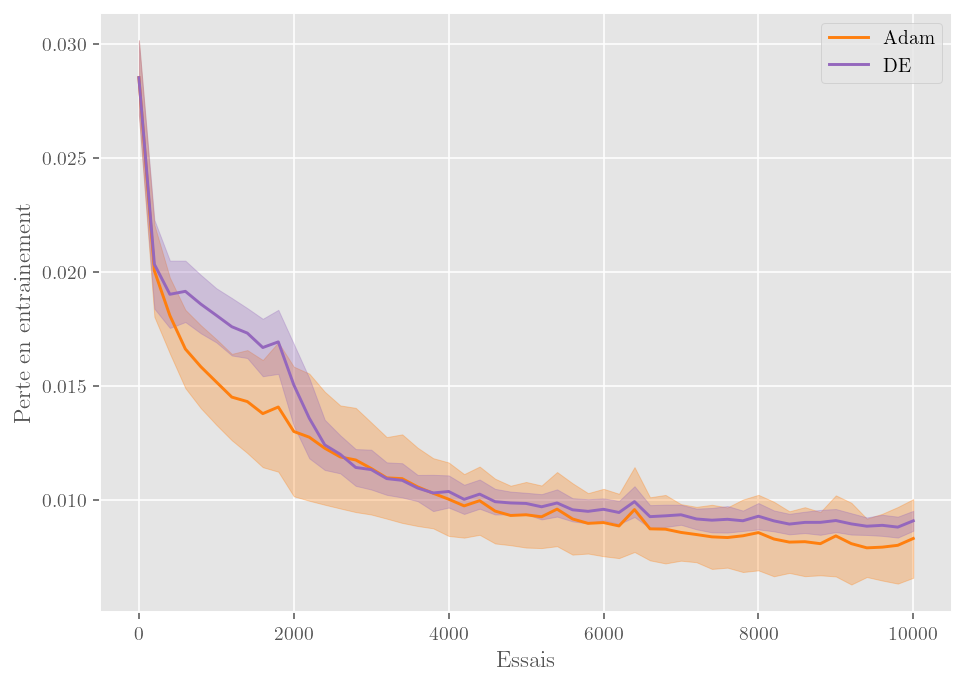

In [239]:
# Plot ratio found pat
metric = "losses"
for i, exp in enumerate(experiments):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, means - stds, means + stds, color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Perte en entrainement")
plt.legend()
plt.tight_layout()

plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


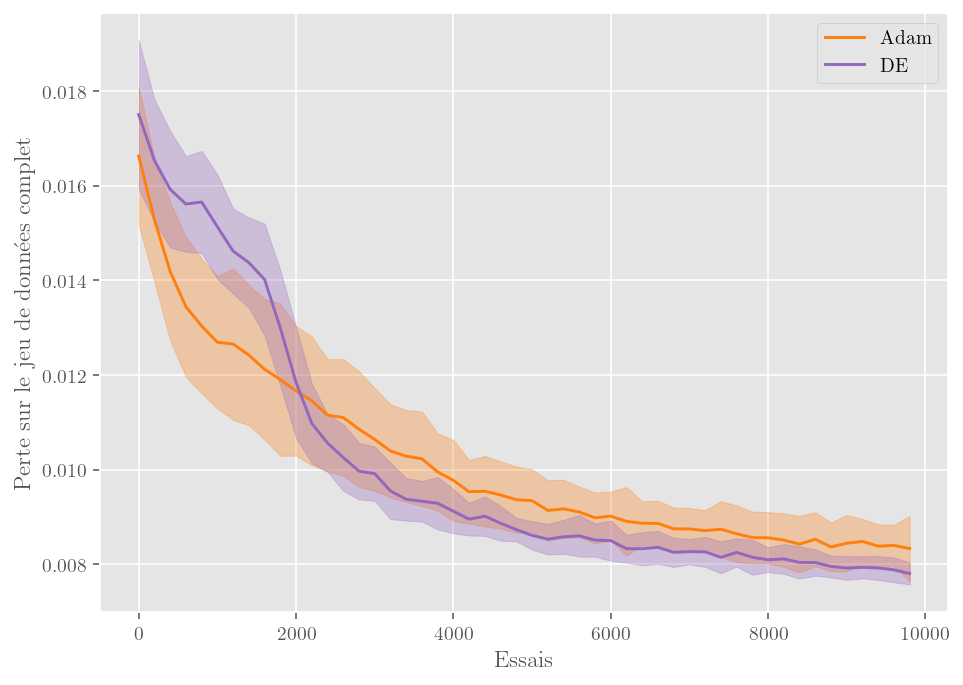

In [240]:
# Plot ratio found pat
metric = "dataset_losses"

for i, exp in enumerate(experiments):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, means - stds, means + stds, color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Perte sur le jeu de données complet")
plt.legend()
plt.tight_layout()
plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


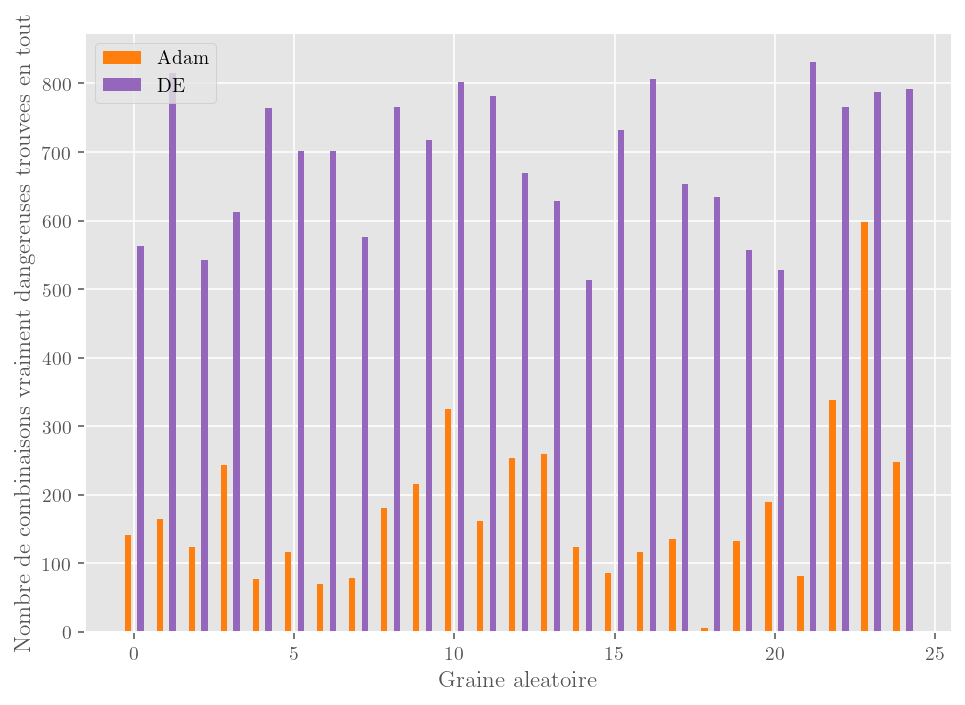

In [241]:
# Plot ratio found pat
metric = "n_inter_alls"

for i, exp in enumerate(experiments):
    n_inters = []
    for j in range(25):
        n_inters.append(metrics_dict[exp][metric][j][-1])

    seeds = np.arange(len(n_inters))
    if i % 2 == 0:
        plt.bar(seeds - 0.2, n_inters, width=0.2, label=labels[i], color=colors[i])
    else:
        plt.bar(seeds + 0.2, n_inters, width=0.2,label=labels[i], color=colors[i])
plt.xlabel('Graine aleatoire')
plt.ylabel("Nombre de combinaisons vraiment dangereuses trouvees en tout")
plt.legend()
plt.tight_layout()
plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_{labels_fn}')


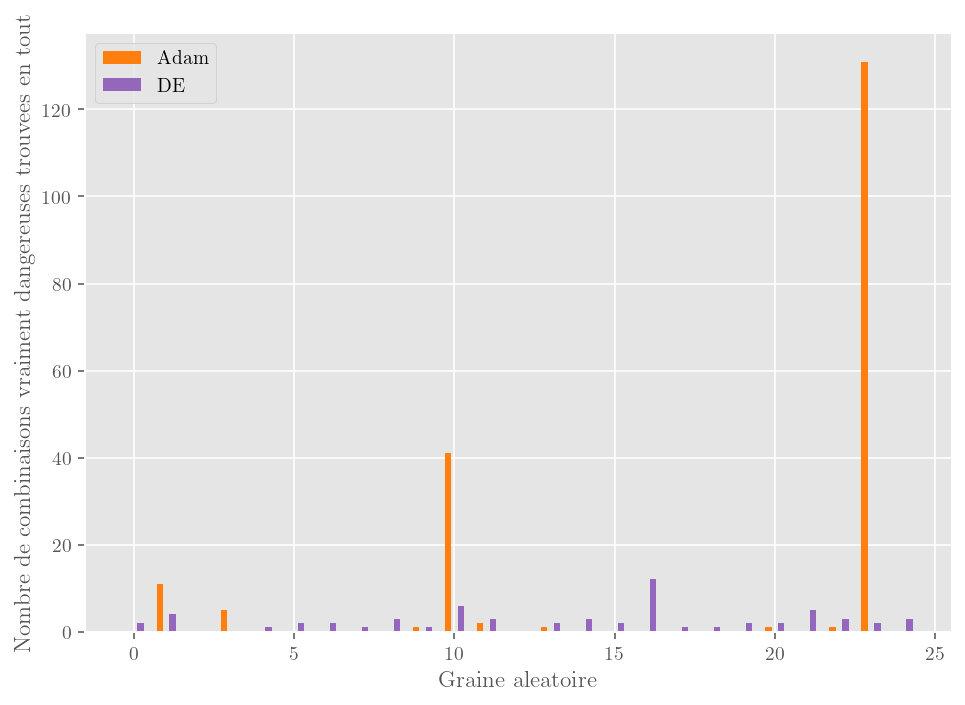

In [242]:
# Plot ratio found pat
metric = "all_flagged_risks"
thresh = 1.0
for i, exp in enumerate(experiments):
    n_flagged_below_thresh = []
    for j in range(25):
        n_flagged_below_thresh.append(sum(metrics_dict[exp][metric][j] < thresh).item())

    seeds = np.arange(len(n_flagged_below_thresh))
    if i % 2 == 0:
        plt.bar(seeds - 0.2, n_flagged_below_thresh, width=0.2, label=labels[i], color=colors[i])
    else:
        plt.bar(seeds + 0.2, n_flagged_below_thresh, width=0.2,label=labels[i], color=colors[i])
plt.xlabel('Graine aleatoire')
plt.ylabel("Nombre de combinaisons vraiment dangereuses trouvees en tout")
plt.legend()
plt.tight_layout()
plt.savefig(f'images/polypharmacy/perf/{prefix}_{metric}_below1_{labels_fn}')

In [243]:
def color_and_label_violinplot(violin, color, label):
    # color = violin["bodies"][0].get_facecolor().flatten()
    for pc in violin['bodies']:
        pc.set_color(color)

    violin["cbars"].set_color(color)
    # violin["cmeans"].set_color(color)
    violin["cmins"].set_color(color)
    violin["cmaxes"].set_color(color)
    
    fig_labels.append((mpatches.Patch(color=color), label))


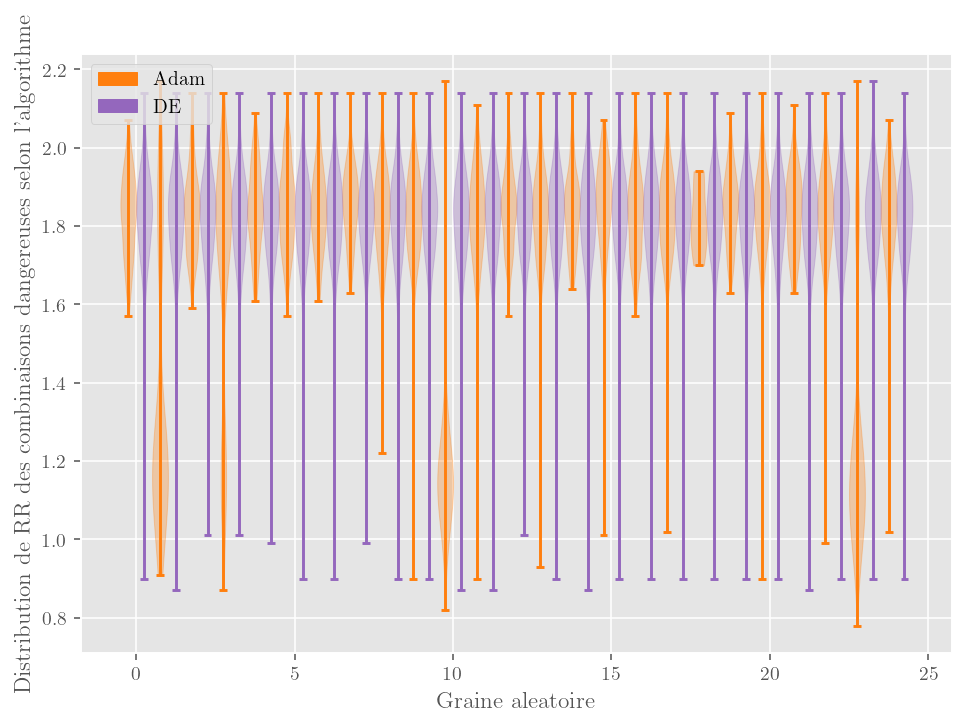

In [244]:
# Plot ratio found pat
fig_labels = []
metric = "all_flagged_risks"
for i, exp in enumerate(experiments):

    all_flagged_risks = metrics_dict[exp][metric]
    all_flagged_risks = [item.squeeze().tolist() for item in all_flagged_risks]

    if i % 2 == 0:
        color_and_label_violinplot(
            plt.violinplot(all_flagged_risks, np.array(list(range(25))) - 0.25),
            label=labels[i],
            color=colors[i],
        )
    else:
        color_and_label_violinplot(
            plt.violinplot(all_flagged_risks, np.array(list(range(25))) + 0.25),
            label=labels[i],
            color=colors[i],
        )


plt.xlabel("Graine aleatoire")
plt.ylabel("Distribution de RR des combinaisons dangereuses selon l'algorithme")
plt.legend(*zip(*fig_labels), loc=2)
plt.tight_layout()
plt.savefig(f"images/polypharmacy/perf/{prefix}_{metric}_where_flagged_{labels_fn}")
